In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
merged_data = pd.read_csv('merged_clean_data.csv')
merged_data

C:\Users\aneja\AppData\Local\Temp\ipykernel_18572\3336442869.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_data = pd.read_csv('merged_clean_data.csv')


,provincename,Longitude,Latitude,Region.Name,Date/Time,Population,GeoUID,productivity_sector,GDP_Value,Station Name,...,Mean Min Temp (°C),Mean Temp (°C),Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,Quebec,-78.28,48.80,Berry (MÉ),1998-01-01,538.0,2488070,Utilities,0.000000,LAC BERRY,...,-22.100000,-15.200000,4.0,-39.0,1.0,42.0,43.0,52.0,0.0,0.0
1,Quebec,-78.28,48.80,Berry (MÉ),1998-01-01,538.0,2488070,Construction,0.484470,LAC BERRY,...,-22.100000,-15.200000,4.0,-39.0,1.0,42.0,43.0,52.0,0.0,0.0
2,Quebec,-78.28,48.80,Berry (MÉ),1998-01-01,538.0,2488070,Manufacturing,3.115150,LAC BERRY,...,-22.100000,-15.200000,4.0,-39.0,1.0,42.0,43.0,52.0,0.0,0.0
3,Quebec,-78.28,48.80,Berry (MÉ),1998-01-01,538.0,2488070,Transportation and warehousing,0.541892,LAC BERRY,...,-22.100000,-15.200000,4.0,-39.0,1.0,42.0,43.0,52.0,0.0,0.0
4,Quebec,-78.28,48.80,Berry (MÉ),1998-01-01,538.0,2488070,Educational services,0.744184,LAC BERRY,...,-22.100000,-15.200000,4.0,-39.0,1.0,42.0,43.0,52.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991723,Saskatchewan,-102.12,49.32,Moose Creek No. 33 (RM),2023-09-01,NaN,4701036,NaN,NaN,OXBOW,...,7.400000,15.116667,33.5,1.0,21.4,0.0,21.4,0.0,0.0,0.0
991724,Saskatchewan,-102.12,49.32,Moose Creek No. 33 (RM),2023-10-01,NaN,4701036,NaN,NaN,OXBOW,...,-0.982143,4.142857,21.0,-18.0,42.8,25.0,67.8,16.0,0.0,0.0
991725,Saskatchewan,-102.12,49.32,Moose Creek No. 33 (RM),2023-11-01,NaN,4701036,NaN,NaN,OXBOW,...,-7.611111,-2.507407,13.5,-17.5,4.0,6.0,10.0,0.0,0.0,0.0
991726,Saskatchewan,-102.12,49.32,Moose Creek No. 33 (RM),2023-12-01,NaN,4701036,NaN,NaN,OXBOW,...,-11.185185,-5.292593,11.5,-20.0,9.6,11.0,20.6,5.0,0.0,0.0


In [25]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991728 entries, 0 to 991727
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   provincename               991728 non-null  object 
 1   Longitude                  991728 non-null  float64
 2   Latitude                   991728 non-null  float64
 3   Region.Name                991728 non-null  object 
 4   Date/Time                  991728 non-null  object 
 5   Population                 982772 non-null  float64
 6   GeoUID                     991728 non-null  int64  
 7   productivity_sector        982772 non-null  object 
 8   GDP_Value                  982772 non-null  float64
 9   Station Name               991728 non-null  object 
 10  Climate ID                 991728 non-null  object 
 11  Mean Max Temp (°C)         971888 non-null  float64
 12  Mean Min Temp (°C)         972098 non-null  float64
 13  Mean Temp (°C)             96

In [26]:
# Convert 'Date/Time' column to datetime format
merged_data['Date/Time'] = pd.to_datetime(merged_data['Date/Time'])

In [27]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991728 entries, 0 to 991727
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   provincename               991728 non-null  object        
 1   Longitude                  991728 non-null  float64       
 2   Latitude                   991728 non-null  float64       
 3   Region.Name                991728 non-null  object        
 4   Date/Time                  991728 non-null  datetime64[ns]
 5   Population                 982772 non-null  float64       
 6   GeoUID                     991728 non-null  int64         
 7   productivity_sector        982772 non-null  object        
 8   GDP_Value                  982772 non-null  float64       
 9   Station Name               991728 non-null  object        
 10  Climate ID                 991728 non-null  object        
 11  Mean Max Temp (°C)         971888 non-null  float64 

In [36]:
merged_data.isnull().sum()

provincename                     0
Longitude                        0
Latitude                         0
Region.Name                      0
Date/Time                        0
Population                    8956
GeoUID                           0
productivity_sector           8956
GDP_Value                     8956
Station Name                     0
Climate ID                       0
Mean Max Temp (°C)           19840
Mean Min Temp (°C)           19630
Mean Temp (°C)               31371
Extr Max Temp (°C)           19840
Extr Min Temp (°C)           19630
Total Rain (mm)                  0
Total Snow (cm)                  0
Total Precip (mm)                0
Snow Grnd Last Day (cm)      99380
Dir of Max Gust (10s deg)        0
Spd of Max Gust (km/h)           0
dtype: int64

           Longitude       Latitude     Population        GeoUID  \
count  991728.000000  991728.000000  982772.000000  9.917280e+05   
mean      -99.331139      48.983008   30477.644748  4.276057e+06   
std        22.002819       3.366456  108415.395620  1.402789e+06   
min      -136.370000      42.040000      41.000000  2.403005e+06   
25%      -119.750000      46.050000    1044.000000  2.480095e+06   
50%      -107.150000      49.180000    3847.000000  4.711042e+06   
75%       -74.370000      51.080000   11249.000000  5.909032e+06   
max       -64.200000      59.570000  934243.000000  5.957022e+06   

           GDP_Value  Mean Max Temp (°C)  Mean Min Temp (°C)  Mean Temp (°C)  \
count  982772.000000       971888.000000       972098.000000   960357.000000   
mean       96.954114           10.430606            0.601615        5.486756   
std       480.806470           10.649480            9.660131        9.969156   
min         0.000000          -24.600000          -37.607143      -

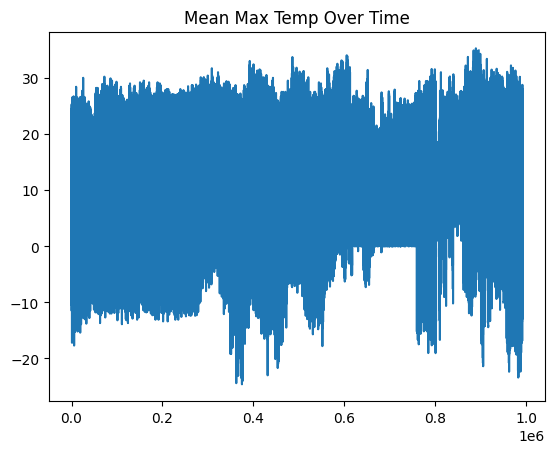

In [28]:
# Explore data distribution and summary statistics
print(merged_data.describe())

# Visualize climate variables over time
merged_data['Mean Max Temp (°C)'].plot(label='Mean Max Temp')
plt.title('Mean Max Temp Over Time')
plt.show()


In [7]:
# Decompose time series to observe trends, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(merged_data['Mean Max Temp (°C)'], model='multiplicative', period=12)
result.plot()
plt.suptitle('Seasonal Decomposition of Mean Max Temp')
plt.show()

ValueError: This function does not handle missing values

In [29]:
# Filter the data for entries up to the year 2021
df_filtered = merged_data[merged_data['Date/Time'].dt.year <= 2021].copy()

# Save the filtered data to a new DataFrame or overwrite the existing DataFrame
df_filtered.to_csv('filtered_data_up_to_2021.csv', index=False)

In [30]:
df_filtered

,provincename,Longitude,Latitude,Region.Name,Date/Time,Population,GeoUID,productivity_sector,GDP_Value,Station Name,...,Mean Min Temp (°C),Mean Temp (°C),Extr Max Temp (°C),Extr Min Temp (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow Grnd Last Day (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
0,Quebec,-78.28,48.80,Berry (MÉ),1998-01-01,538.0,2488070,Utilities,0.000000,LAC BERRY,...,-22.100000,-15.200000,4.0,-39.0,1.0,42.0,43.0,52.0,0.0,0.0
1,Quebec,-78.28,48.80,Berry (MÉ),1998-01-01,538.0,2488070,Construction,0.484470,LAC BERRY,...,-22.100000,-15.200000,4.0,-39.0,1.0,42.0,43.0,52.0,0.0,0.0
2,Quebec,-78.28,48.80,Berry (MÉ),1998-01-01,538.0,2488070,Manufacturing,3.115150,LAC BERRY,...,-22.100000,-15.200000,4.0,-39.0,1.0,42.0,43.0,52.0,0.0,0.0
3,Quebec,-78.28,48.80,Berry (MÉ),1998-01-01,538.0,2488070,Transportation and warehousing,0.541892,LAC BERRY,...,-22.100000,-15.200000,4.0,-39.0,1.0,42.0,43.0,52.0,0.0,0.0
4,Quebec,-78.28,48.80,Berry (MÉ),1998-01-01,538.0,2488070,Educational services,0.744184,LAC BERRY,...,-22.100000,-15.200000,4.0,-39.0,1.0,42.0,43.0,52.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991698,Saskatchewan,-102.12,49.32,Moose Creek No. 33 (RM),2021-12-01,379.0,4701036,"Agriculture forestry fishing hunting, Mining q...",52.738022,OXBOW,...,-18.666667,-13.385185,6.0,-35.0,0.0,14.0,14.0,26.0,0.0,0.0
991699,Saskatchewan,-102.12,49.32,Moose Creek No. 33 (RM),2021-12-01,379.0,4701036,Wholesale trade Retail trade,1.389578,OXBOW,...,-18.666667,-13.385185,6.0,-35.0,0.0,14.0,14.0,26.0,0.0,0.0
991700,Saskatchewan,-102.12,49.32,Moose Creek No. 33 (RM),2021-12-01,379.0,4701036,"Finance and insurance, real estate and rental ...",0.000000,OXBOW,...,-18.666667,-13.385185,6.0,-35.0,0.0,14.0,14.0,26.0,0.0,0.0
991701,Saskatchewan,-102.12,49.32,Moose Creek No. 33 (RM),2021-12-01,379.0,4701036,Professional scientific and technical services,0.640438,OXBOW,...,-18.666667,-13.385185,6.0,-35.0,0.0,14.0,14.0,26.0,0.0,0.0


In [32]:
df_filtered.isnull().sum()

provincename                     0
Longitude                        0
Latitude                         0
Region.Name                      0
Date/Time                        0
Population                     944
GeoUID                           0
productivity_sector            944
GDP_Value                      944
Station Name                     0
Climate ID                       0
Mean Max Temp (°C)           18823
Mean Min Temp (°C)           18613
Mean Temp (°C)               30275
Extr Max Temp (°C)           18823
Extr Min Temp (°C)           18613
Total Rain (mm)                  0
Total Snow (cm)                  0
Total Precip (mm)                0
Snow Grnd Last Day (cm)      95589
Dir of Max Gust (10s deg)        0
Spd of Max Gust (km/h)           0
dtype: int64

In [ ]:
null_pop = df_filtered['Population'] == 

In [33]:
df_filtered.to_csv('filtered_data_up_to_2021.csv', index=False)

In [35]:
df_filtered['Date/Time'].min()
df_filtered['Date/Time'].max()

Timestamp('2021-12-01 00:00:00')